In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from ctf_dataset.load import create_wrapped_dataset
from ctf_dataset import info
from brainiak.isc import isc

In [2]:
base_dir = '/mnt/bucket/labs/hasson/snastase/social-ctf'
data_dir = join(base_dir, 'data')

In [3]:
# Create Wrapped dataset.
wrap_f = create_wrapped_dataset(data_dir, output_dataset_name="virtual.hdf5")

In [28]:
# Show the top-down of map.
def plot_match_summary(ts, isc, coup, wrap_f, map_id=0, matchup_id=0, repeat_id=0, filename=None):
    assert isinstance(map_id, int)
    assert isinstance(matchup_id, int)
    assert isinstance(repeat_id, int)
    
    pops = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

    cols = 8
    rows = 12

    fig = plt.figure(figsize=(2 * cols, 2 * rows))
    gs = fig.add_gridspec(rows, cols)

    ts1_row = 0
    ts1_height = 1
    ts1_axes = fig.add_subplot(gs[ts1_row:ts1_row+ts1_height, :])
    
    ts2_row = ts1_row + ts1_height
    ts2_height = 1
    ts2_axes = fig.add_subplot(gs[ts2_row:ts2_row+ts2_height, :])
    
    coup1_row = ts2_row + ts2_height
    coup1_height = 1
    coup1_axes = fig.add_subplot(gs[coup1_row:coup1_row+coup1_height, :])
    
    coup2_row = coup1_row + coup1_height
    coup2_height = 1
    coup2_axes = fig.add_subplot(gs[coup2_row:coup2_row+coup2_height, :])

    score_row = coup2_row + coup2_height
    score_height = 1
    score_axes = fig.add_subplot(gs[score_row:score_row+score_height, :])

    flag_to_base_dist_row = score_row + score_height
    flag_to_base_dist_height = 1
    flag_to_base_dist_axes = fig.add_subplot(gs[flag_to_base_dist_row:flag_to_base_dist_row+flag_to_base_dist_height, :])

    player_to_base_row = flag_to_base_dist_row + flag_to_base_dist_height
    player_to_base_dist_height = 1
    player_to_base_dist_axes = fig.add_subplot(gs[player_to_base_row:player_to_base_row+player_to_base_dist_height, :])

    health_row = player_to_base_row + player_to_base_dist_height
    health_height = 1
    health_axes = fig.add_subplot(gs[health_row:health_row+health_height, :])

    value0_row = health_row + health_height
    value0_height = 1
    value0_axes = fig.add_subplot(gs[value0_row:value0_row+value0_height, :])

    value1_row = value0_row + value0_height
    value1_height = 1
    value1_axes = fig.add_subplot(gs[value1_row:value1_row+value1_height, :])

    value2_row = value1_row + value1_height
    value2_height = 1
    value2_axes = fig.add_subplot(gs[value2_row:value2_row+value2_height, :])

    value3_row = value2_row + value2_height
    value3_height = 1
    value3_axes = fig.add_subplot(gs[value3_row:value3_row+value3_height, :])

    # Plot time series
    if wrap_f['map/matchup/repeat/player/color_id'][
        map_id, matchup_id, repeat_id, 0][0] == 0:
        team_colors = ['r', 'b']
        player_colors = ['r', 'coral', 'b', 'lightseagreen']
    elif wrap_f['map/matchup/repeat/player/color_id'][
        map_id, matchup_id, repeat_id, 0][0] == 1:
        team_colors = ['b', 'r']
        player_colors = ['b', 'lightseagreen', 'r', 'coral']

    ts1_axes.plot(lstm_pc[0], c=player_colors[0], alpha=.7, lw=.8)
    ts1_axes.plot(lstm_pc[1], c=player_colors[1], alpha=.7, lw=.8)
    ts1_axes.set_xticks([])
    ts1_axes.set_ylabel('activation')
    ts1_axes.set_title(f'PC{pc + 1} (population {pops[matchup_id]}, '
                       f'repeat {repeat_id})')
    ts1_axes.annotate(f'ISC: {lstm_pc_isc[0]:.3f}', (.995, .83),
                      ha='right', xycoords='axes fraction')
    ts1_axes.set_xlim([0, 4500])
    ts2_axes.plot(lstm_pc[2], c=player_colors[2], alpha=.7, lw=.8)
    ts2_axes.plot(lstm_pc[3], c=player_colors[3], alpha=.7, lw=.8)
    ts2_axes.set_xticks([])
    ts2_axes.set_ylabel('activation')
    ts2_axes.annotate(f'ISC: {lstm_pc_isc[5]:.3f}', (.995, .83),
                      ha='right', xycoords='axes fraction')
    ts2_axes.set_xlim([0, 4500])
    
    # Plot coupling time series
    coup1_axes.plot(coup[0], c=team_colors[0], alpha=.7, lw=.8)
    coup1_axes.set_xticks([])
    coup1_axes.set_ylabel('co-fluctuation')
    coup1_axes.set_xlim([0, 4500])
    coup2_axes.plot(coup[5], c=team_colors[1], alpha=.7, lw=.8)
    coup2_axes.set_xticks([])
    coup2_axes.set_ylabel('co-fluctuation')
    coup2_axes.set_xlim([0, 4500])
    
    # Score.
    red_team_score = wrap_f["map/matchup/repeat/time/red_team_score"][map_id, matchup_id, repeat_id, ..., 0].astype(np.float32)
    blue_team_score = wrap_f["map/matchup/repeat/time/blue_team_score"][map_id, matchup_id, repeat_id, ..., 0].astype(np.float32)
    score_axes.plot(red_team_score.T, label="red_team_score", color="r", lw=0.8)
    score_axes.plot(blue_team_score.T, label="blue_team_score", color="b", lw=0.8)
    score_axes.set_ylabel("Score")
    score_axes.set_xlim([0, 4500])

    # Flag distance to capture.
    events_ = wrap_f["map/matchup/repeat/player/time/events"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    color = wrap_f["map/matchup/repeat/player/color_id"][map_id, matchup_id, repeat_id, ...]

    red_flag_position = wrap_f["map/matchup/repeat/time/red_flag_position"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    blue_flag_position = wrap_f["map/matchup/repeat/time/blue_flag_position"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    red_flag_status = wrap_f["map/matchup/repeat/time/red_flag_status"][map_id, matchup_id, repeat_id, ...]
    blue_flag_status = wrap_f["map/matchup/repeat/time/blue_flag_status"][map_id, matchup_id, repeat_id, ...]
    red_base_position = wrap_f["map/red_base_position"][map_id]
    blue_base_position = wrap_f["map/blue_base_position"][map_id]
    red_flag_status = wrap_f["map/matchup/repeat/time/red_flag_status"][map_id, matchup_id, repeat_id, ...]
    blue_flag_status = wrap_f["map/matchup/repeat/time/blue_flag_status"][map_id, matchup_id, repeat_id, ...]

    red_dist = np.sqrt(np.sum(np.square(red_flag_position[..., :2] - blue_base_position[..., :2]), axis=1))
    blue_dist = np.sqrt(np.sum(np.square(blue_flag_position[..., :2] - red_base_position[..., :2]), axis=1))

    red_id = -1 if color[0, 0] == 0 else 1
    blue_id = -red_id

    red_dist_alive = red_dist.copy()
    red_dist_dead = red_dist.copy()
    mask = np.zeros_like(red_dist_alive, dtype=np.bool)
    red_captures = events_[red_id, :, info.events.Events.CTF_CAPTURE_BONUS_TEAM] > 0
    mask[red_captures] = True
    red_flag_times = np.nonzero(mask)[0] - 1
    mask[events_[red_id, :, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0] = True
    red_return_times = np.nonzero(events_[red_id, 1:, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0)[0]
    mask[:-1][events_[red_id, 1:, info.events.Events.CTF_CAPTURE_BONUS_TEAM] > 0] = True
    mask[:-1][events_[red_id, 1:, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0] = True
    red_dist_alive[mask] = np.nan
    red_dist_dead[~mask] = np.nan

    blue_dist_alive = blue_dist.copy()
    blue_dist_dead = blue_dist.copy()
    mask = np.zeros_like(blue_dist_alive, dtype=np.bool)
    blue_captures = events_[blue_id, :, info.events.Events.CTF_CAPTURE_BONUS_TEAM] > 0
    mask[blue_captures] = True
    blue_flag_times = np.nonzero(mask)[0] - 1
    mask[events_[blue_id, :, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0] = True
    blue_return_times = np.nonzero(events_[blue_id, 1:, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0)[0]
    mask[:-1][events_[blue_id, 1:, info.events.Events.CTF_CAPTURE_BONUS_TEAM] > 0] = True
    mask[:-1][events_[blue_id, 1:, info.events.Events.CTF_RECOVERY_BONUS_OTHER_TEAM] > 0] = True
    blue_dist_alive[mask] = np.nan
    blue_dist_dead[~mask] = np.nan

    flag_to_base_dist_axes.plot(red_dist_alive, label="red dist", color="r", lw=0.8, zorder=1)
    flag_to_base_dist_axes.plot(red_dist_dead, label="red dist", color="r", lw=0.8, ls="--", zorder=1)
    flag_to_base_dist_axes.scatter(red_flag_times, red_dist[red_flag_times], color="b", marker="s", zorder=-2, s=10)
    flag_to_base_dist_axes.scatter(red_flag_times+1, red_dist[red_flag_times + 1], color="r", marker="s", zorder=-2, s=10)
    flag_to_base_dist_axes.scatter(red_return_times+1, red_dist[red_return_times+1], color="r", marker="s", zorder=-2, s=10)

    flag_to_base_dist_axes.plot(blue_dist_alive, label="blue dist", color="b", lw=0.8, zorder=1)
    flag_to_base_dist_axes.plot(blue_dist_dead, label="blue dist", color="b", lw=0.8, ls="--", zorder=1)
    flag_to_base_dist_axes.scatter(blue_flag_times, blue_dist[blue_flag_times], color="r", marker="s", zorder=-2, s=10)
    flag_to_base_dist_axes.scatter(blue_flag_times + 1, blue_dist[blue_flag_times + 1], color="b", marker="s", zorder=-2, s=10)
    flag_to_base_dist_axes.scatter(blue_return_times+1, blue_dist[blue_return_times+1], color="b", marker="s", zorder=-2, s=10)

    flag_to_base_dist_axes.set_ylabel("Flag distance\nto capture")
    flag_to_base_dist_axes.set_xlim([0, 4500])

    # Distance to other base.
    health = wrap_f["map/matchup/repeat/player/time/health"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    position = wrap_f["map/matchup/repeat/player/time/position"][map_id, matchup_id, repeat_id].astype(np.float32)
    own_base_position = wrap_f["map/matchup/repeat/player/own_base_position"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    opponent_base_position = wrap_f["map/matchup/repeat/player/opponent_base_position"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    own_base_position = np.expand_dims(own_base_position, axis=-2)
    opponent_base_position = np.expand_dims(opponent_base_position, axis=-2)

    position_alive = position.copy()
    position_alive[health[..., 0] == 0.0] = np.nan
    position_dead = position.copy()
    position_dead[..., 1:, :][health[..., :-1, 0] != 0.0] = np.nan

    dist_alive = np.sqrt(np.sum(np.square(position_alive[..., :2] - opponent_base_position[..., :2]), axis=-1))
    dist_dead = np.sqrt(np.sum(np.square(position_dead[..., :2] - opponent_base_position[..., :2]), axis=-1))

    for p in range(4):
        player_to_base_dist_axes.plot(dist_alive[p, :], color="r" if color[p, 0] == 0 else "b", lw=0.8)
        player_to_base_dist_axes.plot(dist_dead[p, :], color="r" if color[p, 0] == 0 else "b", lw=0.8, ls="--")
        player_to_base_dist_axes.set_ylabel("Player distance\nto opponent base")
        player_to_base_dist_axes.set_xlim([0, 4500])

    # This data lines up with picking up from base.

    # Health.
    health = wrap_f["map/matchup/repeat/player/time/health"][map_id, matchup_id, repeat_id, ...].astype(np.float32)

    for p in range(4):
        health_axes.plot(health[p, :, 0], color="r" if color[p, 0] == 0 else "b", lw=0.8)
    health_axes.set_ylabel("Health")
    health_axes.set_xlim([0, 4500])

    # Values.
    agent_id = wrap_f["map/matchup/repeat/player/agent_id"][map_id, matchup_id, repeat_id, ...]
    discount = wrap_f["agent/discount"][...][agent_id[..., 0]]
    reward = wrap_f["map/matchup/repeat/player/time/reward"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    value = wrap_f["map/matchup/repeat/player/time/value"][map_id, matchup_id, repeat_id, ...].astype(np.float32)
    discounted_return = wrap_f["map/matchup/repeat/player/time/discounted_return"][map_id, matchup_id, repeat_id, ...]


    np.set_printoptions(linewidth=400)
    value[:, -1, :] = 0.0
    td_error =  discount[:] * value[:, 1:, 0] + reward[:, 1:, 0] - value[:, :-1, 0]

    # TODO...
    td_error_16 =  (discount[:] ** 16) * value[:, 16:, 0] + reward[:, 1:-15, 0] - value[:, :-16, 0]

    value0_axes.plot(reward[0], label="reward", lw=1.0)
    value0_axes.plot(value[0], label="value", lw=1.0)
    value0_axes.plot(discounted_return[0], label="discounted return", lw=1.0)
    value0_axes.plot(value[0] - discounted_return[0], label="prediction error", lw=1.0)
    value0_axes.plot(td_error[0], label="td error", lw=1.0)
    value0_axes.set_xlim([0, 4500])
    value0_axes.set_ylabel("Player 0 ({})\nValue".format("red" if color[0, 0] == 0 else "blue"))

    value1_axes.plot(reward[1], label="reward", lw=1.0)
    value1_axes.plot(value[1], label="value", lw=1.0)
    value1_axes.plot(discounted_return[1], label="discounted return", lw=1.0)
    value1_axes.plot(value[1] - discounted_return[1], label="prediction error", lw=1.0)
    value1_axes.plot(td_error[1], label="td error", lw=1.0)
    value1_axes.set_xlim([0, 4500])
    value1_axes.set_ylabel("Player 1 ({})\nValue".format("red" if color[1, 0] == 0 else "blue"))

    value2_axes.plot(reward[2], label="reward", lw=1.0)
    value2_axes.plot(value[2], label="value", lw=1.0)
    value2_axes.plot(discounted_return[2], label="discounted return", lw=1.0)
    value2_axes.plot(value[2] - discounted_return[2], label="prediction error", lw=1.0)
    value2_axes.plot(td_error[2], label="td error", lw=1.0)
    value2_axes.set_xlim([0, 4500])
    value2_axes.set_ylabel("Player 2 ({})\nValue".format("red" if color[2, 0] == 0 else "blue"))
  
    value3_axes.plot(reward[3], label="reward", lw=1.0)
    value3_axes.plot(value[3], label="value", lw=1.0)
    value3_axes.plot(discounted_return[3], label="discounted return", lw=1.0)
    value3_axes.plot(value[3] - discounted_return[3], label="prediction error", lw=1.0)
    value3_axes.plot(td_error[3], label="td error", lw=1.0)
    value3_axes.set_xlim([0, 4500])
    value3_axes.set_ylabel("Player 3 ({})\nValue".format("red" if color[3, 0] == 0 else "blue"))
    value3_axes.legend(loc='right')


    # Plot captures at the end.
    blue_score = np.tile(np.expand_dims(np.nonzero(red_captures)[0], 0), (2, 1))
    red_score = np.tile(np.expand_dims(np.nonzero(blue_captures)[0], 0), (2, 1))
    for ax in [score_axes, flag_to_base_dist_axes,
               player_to_base_dist_axes, health_axes, value0_axes, value1_axes,
               value2_axes, value3_axes]:
        y_lims = ax.axes.get_ylim()
        red_ys = np.tile(np.expand_dims(np.asarray(y_lims), axis=-1), (1, red_score.shape[0]))
        #ax.plot(red_score, red_ys, c="r", zorder=-2, lw=0.8, ls="dotted")
        if red_score.shape[1] > 0:
            ax.plot(red_score, c="r", zorder=-2, lw=0.8, ls="dotted")
        blue_ys = np.tile(np.expand_dims(np.asarray(y_lims), axis=-1), (1, blue_score.shape[0]))
        #ax.plot(blue_score, blue_ys, c="b", zorder=-2, lw=0.8, ls="dotted")
        if blue_score.shape[1] > 0:
            ax.plot(blue_score, c="b", zorder=-2, lw=0.8, ls="dotted")
        ax.set_ylim(y_lims)
        
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

In [31]:
a = 1

In [9]:
# Set example filters
map_id, matchup_id, repeat_id = 0, 0, 0

In [8]:
# Load in PCA-reduced LSTMs
k = 100
lstms_pca = np.load(f'results/lstms_tanh-z_pca-k{k}.npy')

In [10]:
# Load in PC time series and get ISC
pc = 3 - 1 

lstm_pc = lstms_pca[matchup_id, repeat_id, ..., pc]
lstm_pc_isc = isc(lstm_pc.T, pairwise=True)[:, 0]

In [11]:
# Load in coupling time series
iscfs = np.load(f'results/iscf_lstm_tanh-z_pca-k{k}_m{matchup_id}_r{repeat_id}.npy')[..., pc, pc]

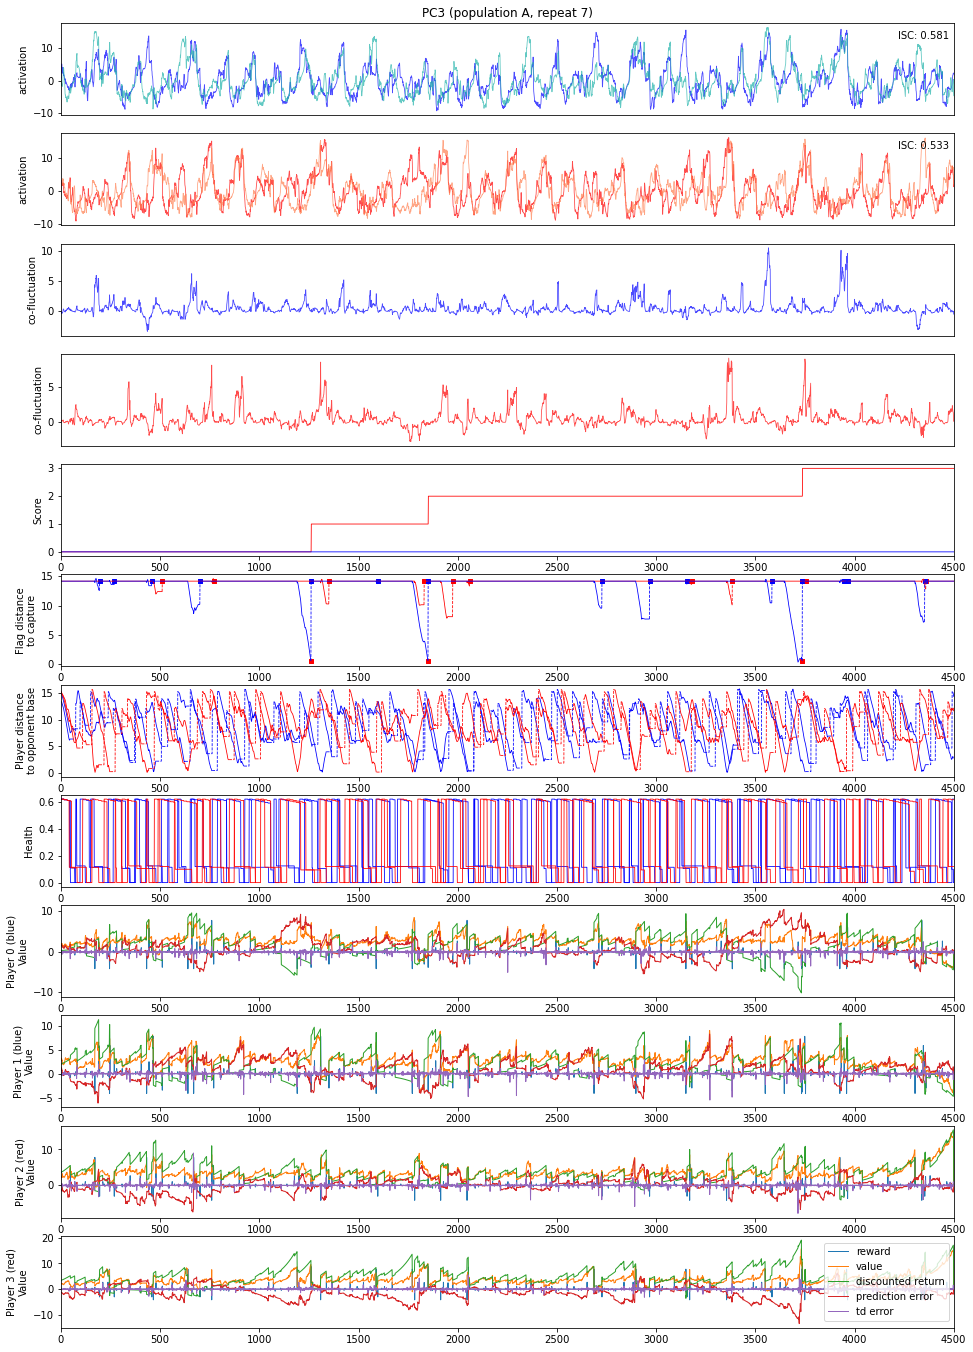

In [29]:
# Example plot
plot_match_summary(lstm_pc, lstm_pc_isc, iscfs, wrap_f, map_id=map_id,
                   matchup_id=matchup_id, repeat_id=repeat_id)

In [32]:
# Generate plots for all PCs and repeats
k = 100
lstms_pca = np.load(f'results/lstms_tanh-z_pca-k{k}.npy')

map_id = 0
matchup_id = 0
pcs = [3, 4, 6, 7, 8, 9, 10]
for pc in pcs:
    
    pc -= 1
    for repeat_id in range(8):
        lstm_pc = lstms_pca[matchup_id, repeat_id, ..., pc]
        lstm_pc_isc = isc(lstm_pc.T, pairwise=True)[:, 0]
        iscfs = np.load(f'results/iscf_lstm_tanh-z_pca-k{k}_m{matchup_id}_r{repeat_id}.npy')[..., pc, pc]
    
        fn = f'figures/summary_pc{pc + 1}-iscf_m{matchup_id}_r{repeat_id}.png'
        plot_match_summary(lstm_pc, lstm_pc_isc, iscfs, wrap_f, map_id=map_id,
                           matchup_id=matchup_id, repeat_id=repeat_id, filename=fn)
        plt.close()
        print(f"Finished match summary figure for PC{pc + 1} repeat {repeat_id}")

Finished match summary figure for PC3 repeat 0
Finished match summary figure for PC3 repeat 1
Finished match summary figure for PC3 repeat 2
Finished match summary figure for PC3 repeat 3
Finished match summary figure for PC3 repeat 4
Finished match summary figure for PC3 repeat 5
Finished match summary figure for PC3 repeat 6
Finished match summary figure for PC3 repeat 7
Finished match summary figure for PC4 repeat 0
Finished match summary figure for PC4 repeat 1
Finished match summary figure for PC4 repeat 2
Finished match summary figure for PC4 repeat 3
Finished match summary figure for PC4 repeat 4
Finished match summary figure for PC4 repeat 5
Finished match summary figure for PC4 repeat 6
Finished match summary figure for PC4 repeat 7
Finished match summary figure for PC6 repeat 0
Finished match summary figure for PC6 repeat 1
Finished match summary figure for PC6 repeat 2
Finished match summary figure for PC6 repeat 3
Finished match summary figure for PC6 repeat 4
Finished matc